In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
url="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"

In [28]:
training_set = pd.read_csv(url)
training_set['India'] = training_set['India'].fillna(0)

In [29]:
training_set.columns.get_loc("India")

92

In [30]:
rows=len(training_set)
rows

274

In [31]:
training_set = training_set.iloc[:,92:93].values

In [32]:
type(training_set)

numpy.ndarray

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [34]:
X_train = training_set[0:rows-1]
y_train = training_set[1:rows]

In [35]:
X_train = np.reshape(X_train, (rows-1, 1, 1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [37]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 9/1000
9/9 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 10/1000
9/9 [==============================] - 0s 1ms/step - loss: 0.0514
Epoch 11/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 12/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 13/1000
9/9 [==============================

In [38]:
urltest="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"
test_set = pd.read_csv(urltest)
test_set['India'] = test_set['India'].fillna(0)
rows=len(test_set)
real_value = test_set.iloc[:,92:93].values
inputs = real_value
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (rows, 1, 1))

In [39]:
predicted_value = regressor.predict(inputs)
predicted_value = sc.inverse_transform(predicted_value)

In [40]:
predicted_value

array([[  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10748.089 ],
       [  10749.119 ],
       [  10749.119 ],
       [  10749.119 ],
       [  10750.378 ],
       [  10750.378 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  10751.408 ],
       [  1

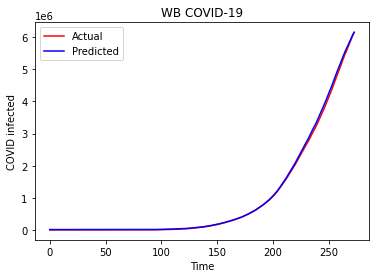

In [41]:
plt.plot(real_value, color = 'red', label = 'Actual')
#plt.set_size_inches(16,5)
plt.plot(predicted_value, color = 'blue', label = 'Predicted')
plt.title('WB COVID-19')
plt.xlabel('Time')
plt.ylabel('COVID infected')
plt.legend()

In [42]:
predicted_value[-10:]

array([[5482597. ],
       [5563081.5],
       [5632137.5],
       [5708313. ],
       [5786835. ],
       [5864385.5],
       [5940759. ],
       [6019433.5],
       [6091852. ],
       [6153637. ]], dtype=float32)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
R2_score = r2_score(real_value, predicted_value)
print('R2 score: ', R2_score)

R2 score:  0.9993097583639399
